In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Azure/MachineLearningNotebooks/master/how-to-use-azureml/automated-machine-learning/forecasting-bike-share/bike-no.csv")
data.head()

,instant,date,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


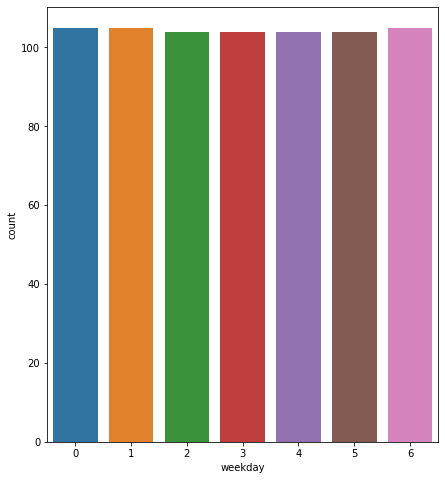

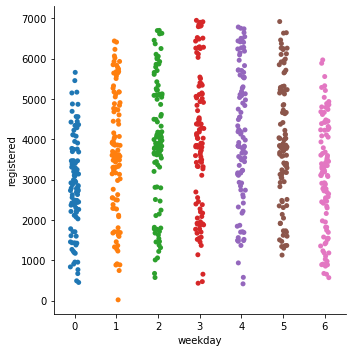

In [5]:
plt.figure(figsize=(7,8))
sns.countplot(x="weekday",data=data)
sns.catplot(x="weekday",y="registered",data=data)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e1b60e3520>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1b60e3b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1b60e30d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1b60ed2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1b60ed670>],
 'means': []}

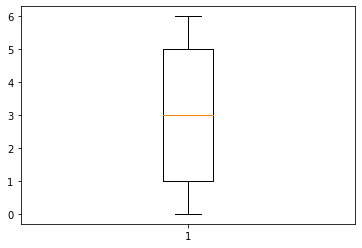

In [6]:
plt.boxplot(data.weekday)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1b6231340>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1b6231a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1b6142f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1b623f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1b623f550>],
 'means': []}

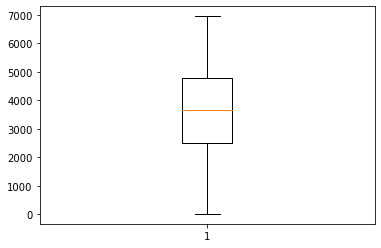

In [7]:
plt.boxplot(data.registered)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1b6392a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1b63a1220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1b6392700>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1b63a1940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1b63a1cd0>],
 'means': []}

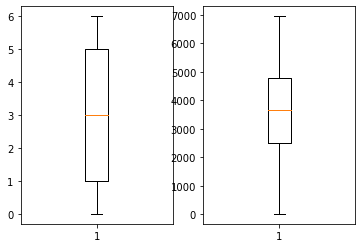

In [9]:
plt.subplot(1,2,1)
plt.boxplot(data.weekday)
plt.subplot(1,2,2)
plt.boxplot(data.registered)

In [11]:
train=data.iloc[0:731]

In [12]:
print(train)

     instant        date  season  yr  mnth  weekday  weathersit      temp  \
0          1    1/1/2011       1   0     1        6           2  0.344167   
1          2    1/2/2011       1   0     1        0           2  0.363478   
2          3    1/3/2011       1   0     1        1           1  0.196364   
3          4    1/4/2011       1   0     1        2           1  0.200000   
4          5    1/5/2011       1   0     1        3           1  0.226957   
..       ...         ...     ...  ..   ...      ...         ...       ...   
726      727  12/27/2012       1   1    12        4           2  0.254167   
727      728  12/28/2012       1   1    12        5           2  0.253333   
728      729  12/29/2012       1   1    12        6           2  0.253333   
729      730  12/30/2012       1   1    12        0           1  0.255833   
730      731  12/31/2012       1   1    12        1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  
0    0.36362

In [13]:
data.shape

(731, 14)

In [14]:
train.shape

(731, 14)

In [15]:
from scipy.stats import pearsonr
pearsonr(data.weekday,data.registered)

(0.057367444036803925, 0.1212216381117088)

In [18]:
import statsmodels.api as sm
train_x=train.weekday
train_y=train.registered
train_x=sm.add_constant(train_x)
train_x.head()

C:\Users\madhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,weekday
0,1.0,6
1,1.0,0
2,1.0,1
3,1.0,2
4,1.0,3


In [19]:
model=sm.OLS(train_y,train_x).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.407
Date:                Tue, 29 Mar 2022   Prob (F-statistic):              0.121
Time:                        20:03:47   Log-Likelihood:                -6410.3
No. Observations:                 731   AIC:                         1.282e+04
Df Residuals:                     729   BIC:                         1.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3522.3532    103.747     33.951      0.000    3318.675    3726.031
weekday       44.6471     28.777      1.551      0.121     -11.849     101.143
==============================================================================
Omnibus:                       38.984   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.657
Skew:                           0.036   Prob(JB):                     0.000398
Kurtosis:                       2.287   Cond. No.                         6.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
train_x=train.weekday
train_y=train.registered
train_x=sm.add_constant(train_x)
model.predict(train_x)

C:\Users\madhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0      3790.235818
1      3522.353223
2      3567.000322
3      3611.647421
4      3656.294520
          ...     
726    3700.941619
727    3745.588718
728    3790.235818
729    3522.353223
730    3567.000322
Length: 731, dtype: float64

<AxesSubplot:xlabel='weekday', ylabel='registered'>

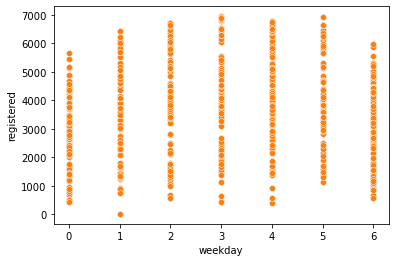

In [27]:

sns.scatterplot(x=train.weekday,y=train.registered)
sns.scatterplot(x=train.weekday,y=train.registered)
